<a href="https://colab.research.google.com/github/sukhyun1017/pytorch-study/blob/main/pytorch_%EB%8B%A4%EC%A4%91%ED%8D%BC%EC%85%89%ED%8A%B8%EB%A1%A0_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader,TensorDataset
import torch.nn as nn
import matplotlib.pyplot as plt
import random

In [41]:
USE_CUDA = torch.cuda.is_available() # GPU를 사용가능하면 True, 아니라면 False를 리턴
device = torch.device("cuda" if USE_CUDA else "cpu") # GPU 사용 가능하면 사용하고 아니면 CPU 사용
print("다음 기기로 학습합니다:", device)

다음 기기로 학습합니다: cuda


In [94]:
# MNIST dataset
#torchvision.datasets.dsets.MNIST를 통해서 dataset 불러오기
mnist_train = dsets.MNIST(root='MNIST_data/', #다운받을 경로
                          train=True,         #훈련or 테스트
                          transform=transforms.ToTensor(), #텐서로 변환
                          download=True) #경로에 없으면 다운

mnist_test = dsets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

In [95]:
data_loader = DataLoader(dataset=mnist_train,
                         batch_size=64,
                         shuffle=True,
                         drop_last=True) # 마지막 배치를 버릴지 말지

In [96]:
model = nn.Sequential()
model.add_module('fully connected1',nn.Linear(28*28*1,100))
model.add_module('ReLU1',nn.ReLU())
model.add_module('fully connected2',nn.Linear(100,100))
model.add_module('ReLU2',nn.ReLU())
model.add_module('fully connected3',nn.Linear(100,10))
model.to(device)
print(model)

Sequential(
  (fully connected1): Linear(in_features=784, out_features=100, bias=True)
  (ReLU1): ReLU()
  (fully connected2): Linear(in_features=100, out_features=100, bias=True)
  (ReLU2): ReLU()
  (fully connected3): Linear(in_features=100, out_features=10, bias=True)
)


In [97]:
from torch import optim
loss_fn = nn.CrossEntropyLoss().to(device)
optimizer = optim.SGD(model.parameters(),lr=0.01)

In [98]:
training_epochs=20
for epoch in range(training_epochs): 
    avg_cost = 0
    total_batch = len(data_loader)

    for X, Y in data_loader:
        # 배치 크기가 64이므로 아래의 연산에서 X는 (64, 784)의 텐서가 된다.
        X = X.view(-1, 28 * 28).to(device)
        # 레이블은 원-핫 인코딩이 된 상태가 아니라 0 ~ 9의 정수.
        Y = Y.to(device)

        optimizer.zero_grad()
        H = model(X)
        cost = loss_fn(H, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning finished')

Epoch: 0001 cost = 1.648458242
Epoch: 0002 cost = 0.541087210
Epoch: 0003 cost = 0.391180605
Epoch: 0004 cost = 0.343020737
Epoch: 0005 cost = 0.314616352
Epoch: 0006 cost = 0.293899417
Epoch: 0007 cost = 0.276981801
Epoch: 0008 cost = 0.261054039
Epoch: 0009 cost = 0.246710524
Epoch: 0010 cost = 0.233076841
Epoch: 0011 cost = 0.219957769
Epoch: 0012 cost = 0.207690403
Epoch: 0013 cost = 0.196334973
Epoch: 0014 cost = 0.186458752
Epoch: 0015 cost = 0.176632985
Epoch: 0016 cost = 0.168399528
Epoch: 0017 cost = 0.160630032
Epoch: 0018 cost = 0.153511137
Epoch: 0019 cost = 0.146868333
Epoch: 0020 cost = 0.140588194
Learning finished


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:67: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:57: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


Accuracy: 0.9490000009536743
random r: 2939
Label:  9
Prediction:  9


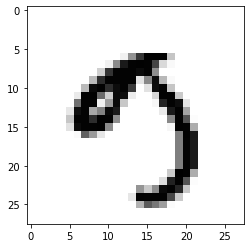

In [116]:
with torch.no_grad(): #gradient 계산 x

  X_test = mnist_test.test_data.view(-1,28*28).float().to(device)
  Y_test = mnist_test.test_labels.to(device)

  prediction = model(X_test)
  correct_prediction = torch.argmax(prediction, 1) == Y_test
  accuracy = correct_prediction.float().mean()
  print('Accuracy:', accuracy.item())

  r = random.randint(0, len(mnist_test) - 1)
  print('random r:',r)
  X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float().to(device)
  Y_single_data = mnist_test.test_labels[r:r + 1].to(device)

  print('Label: ', Y_single_data.item())
  single_prediction = model(X_single_data)
  print('Prediction: ', torch.argmax(single_prediction, 1).item())

  plt.imshow(mnist_test.test_data[r:r + 1].view(28, 28), cmap='Greys', interpolation='nearest')
  plt.show()